# Recap of Last Week

### What have we covered

- Dimensionality Redution
    - PCA
    - Kernel PCA
    - ICA
- Autoencoders
- Intro into Time Series Analysis

# Content of Today

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
goe_blue = '#003665'
light_blue = '#BDCEE3'
neonblue = '#04D9FF'
# % secondary colors
sec_dark_blue = '#006597'
sec_mid_blue = '#0093c7'
cs_orange = '#e07f41'
grey4 = '#DADADA'

from sklearn import datasets
from sklearn.datasets import fetch_openml

import scipy

from IPython.display import Image

In [2]:
mnist = fetch_openml('mnist_784', cache=True, as_frame=False)

# set parameters

In [6]:
h, w = (28, 28)
n_images = 8 
I = np.zeros((n_images * h, n_images * w))

In [7]:
X = mnist.data
y = mnist.target
X38 = X[(y == '3') | (y == '8')]
y38 = y[(y == '3') | (y == '8')]

In [10]:
mu38 = X38.mean(axis=0, keepdims=True)
Xc38 = X38 - mu38

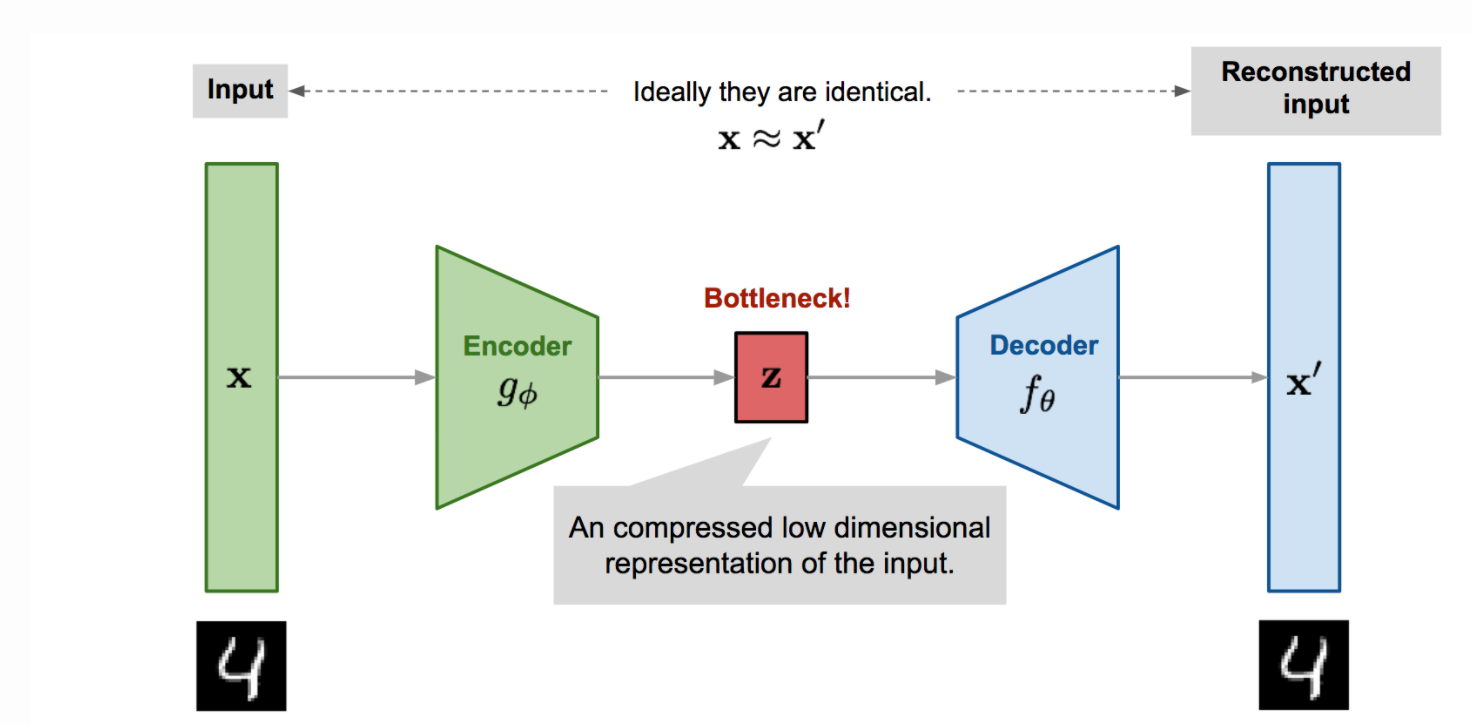

In [11]:
Image("Autoencoder.png")

# from https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html

## The Idea Behind Autoencoders

- it learns an identity function in an unsupervised way
- learns to reconstruct the image while compressing the data in the process
- discoveres efficient and compressed representations
- Usually, Encoder and Decoder are neural networks, either multi-layer-perceptrons (MLPs) or convolutional neural networks (CNNs)

### Benefits

The Autoencoder is incredibly powerful, it allows for:
- generating new images (by sampling the latent space)
- denoising
- super resolution
- colorization

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Set up the Architecure of the Autoencoder

In [16]:
# Let's Begin with 2 layers for the encoder and the decoder

# Encoder
encoder_sizes = (300, 200)

n_latent = 2

# Decoder structure
decoder_sizes = (200, 300)

### Select the nonlinear activation functions of the MLP

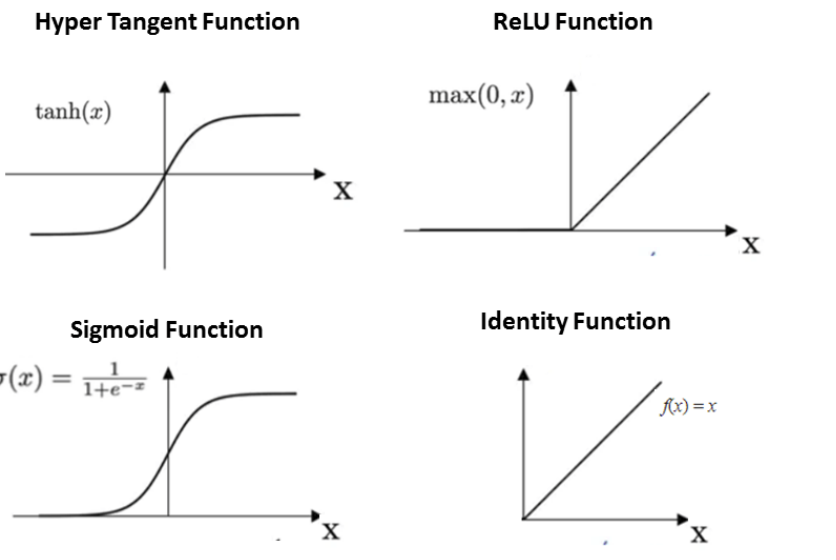

In [17]:
Image("activation_functions.png")
# from https://doku.lrz.de/download/attachments/56919081/deep_learning_intro.pdf?version=1&modificationDate=1594994196657&api=v2

In [19]:
(*encoder_sizes, n_latent, *decoder_sizes)

(300, 200, 2, 200, 300)

### Model training extended

In [ ]:
# get the range of values of our images between -1 and 1, which helps to train neural networks
Xc38_normalized = Xc38 / np.max(np.abs(Xc38))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(Xc38_normalized, y38, test_size=0.2, random_state=42)

In [20]:
reg = MLPRegressor(hidden_layer_sizes = (*encoder_sizes, n_latent, *decoder_sizes), 
                   activation='tanh', 
                   learning_rate_init=.0001, 
                   max_iter=20, 
                   verbose=True)

In [26]:
loss_curves = []
for lr in [1e-3, 1e-4, 1e-5]:
    for max_iter in [10, 20, 50]:
        reg = MLPRegressor(hidden_layer_sizes = (*encoder_sizes, n_latent, *decoder_sizes), 
                   activation='tanh', 
                   learning_rate_init=lr, 
                   max_iter=max_iter, 
                   verbose=True)
        reg.fit(train_x, train_x)
        loss_curves.append(reg.loss_curve_)


Iteration 1, loss = 0.02671567
Iteration 2, loss = 0.02512437
Iteration 3, loss = 0.02508081
Iteration 4, loss = 0.02506366
Iteration 5, loss = 0.02506004
Iteration 6, loss = 0.02505582
Iteration 7, loss = 0.02505608
Iteration 8, loss = 0.02503796
Iteration 9, loss = 0.02502088
Iteration 10, loss = 0.02484753


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.02708956
Iteration 2, loss = 0.02525603
Iteration 3, loss = 0.02510940
Iteration 4, loss = 0.02507829
Iteration 5, loss = 0.02506348
Iteration 6, loss = 0.02505588
Iteration 7, loss = 0.02505466
Iteration 8, loss = 0.02504795
Iteration 9, loss = 0.02504212
Iteration 10, loss = 0.02504669
Iteration 11, loss = 0.02504106
Iteration 12, loss = 0.02503077
Iteration 13, loss = 0.02502845
Iteration 14, loss = 0.02503273
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02727323
Iteration 2, loss = 0.02513378
Iteration 3, loss = 0.02508205
Iteration 4, loss = 0.02507336
Iteration 5, loss = 0.02505963
Iteration 6, loss = 0.02506356
Iteration 7, loss = 0.02505652
Iteration 8, loss = 0.02504440
Iteration 9, loss = 0.02503986
Iteration 10, loss = 0.02503622
Iteration 11, loss = 0.02497582
Iteration 12, loss = 0.02468999
Iteration 13, loss = 0.02445525
Iteration 14, loss = 0.02434090
Iteration 15, loss = 0.02429199


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.03195189
Iteration 2, loss = 0.02716513
Iteration 3, loss = 0.02558661
Iteration 4, loss = 0.02531171
Iteration 5, loss = 0.02520590
Iteration 6, loss = 0.02513973
Iteration 7, loss = 0.02509443
Iteration 8, loss = 0.02506908
Iteration 9, loss = 0.02504982
Iteration 10, loss = 0.02503892
Iteration 11, loss = 0.02503225
Iteration 12, loss = 0.02502614
Iteration 13, loss = 0.02502261
Iteration 14, loss = 0.02501733
Iteration 15, loss = 0.02501367
Iteration 16, loss = 0.02501079
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.03148880
Iteration 2, loss = 0.02637060
Iteration 3, loss = 0.02527292
Iteration 4, loss = 0.02513674
Iteration 5, loss = 0.02509168
Iteration 6, loss = 0.02506756
Iteration 7, loss = 0.02505083
Iteration 8, loss = 0.02504064
Iteration 9, loss = 0.02503451
Iteration 10, loss = 0.02502803
Iteration 11, loss = 0.02502303
Iteration 12, loss = 0.02502096
Iteration 13, loss = 0.02501731


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.03462314
Iteration 2, loss = 0.03343905
Iteration 3, loss = 0.03262742
Iteration 4, loss = 0.03189006
Iteration 5, loss = 0.03108731
Iteration 6, loss = 0.03022839
Iteration 7, loss = 0.02938889
Iteration 8, loss = 0.02861551
Iteration 9, loss = 0.02793476
Iteration 10, loss = 0.02736541
Iteration 11, loss = 0.02690844
Iteration 12, loss = 0.02654953
Iteration 13, loss = 0.02627028
Iteration 14, loss = 0.02605177
Iteration 15, loss = 0.02588075
Iteration 16, loss = 0.02574466
Iteration 17, loss = 0.02563608
Iteration 18, loss = 0.02554811
Iteration 19, loss = 0.02547658
Iteration 20, loss = 0.02541731


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.03557799
Iteration 2, loss = 0.03405968
Iteration 3, loss = 0.03301906
Iteration 4, loss = 0.03216353
Iteration 5, loss = 0.03135906
Iteration 6, loss = 0.03058415
Iteration 7, loss = 0.02987267
Iteration 8, loss = 0.02922751
Iteration 9, loss = 0.02862783
Iteration 10, loss = 0.02806208
Iteration 11, loss = 0.02754576
Iteration 12, loss = 0.02709764
Iteration 13, loss = 0.02672403
Iteration 14, loss = 0.02641942
Iteration 15, loss = 0.02617441
Iteration 16, loss = 0.02597878
Iteration 17, loss = 0.02582188
Iteration 18, loss = 0.02569600
Iteration 19, loss = 0.02559459
Iteration 20, loss = 0.02551227
Iteration 21, loss = 0.02544516
Iteration 22, loss = 0.02539012
Iteration 23, loss = 0.02534458
Iteration 24, loss = 0.02530649
Iteration 25, loss = 0.02527465
Iteration 26, loss = 0.02524735
Iteration 27, loss = 0.02522419
Iteration 28, loss = 0.02520432
Iteration 29, loss = 0.02518707
Iteration 30, loss = 0.02517195
Training loss did not improve more than tol=0.000

[[<matplotlib.lines.Line2D at 0x7f4a67990af0>],

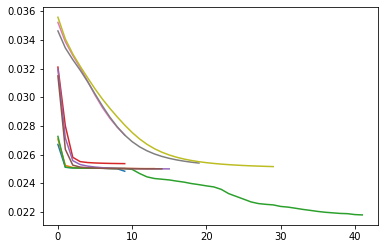

In [28]:
[plt.plot(i) for i in loss_curves]

# Exercise 1: Perform a Hyperparameter Search on Training Parameters

Run the training of the encoder for either (10, 20, or 50) steps, and set the learning rate to three different values.
Plot the resulting loss. curves for all combinations

## Visualize training

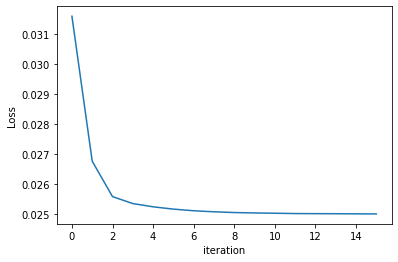

In [24]:
plt.plot(reg.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("iteration");

## Show Reconstructions

In [29]:
xhat = reg.predict(test_x) * 255 + mu38

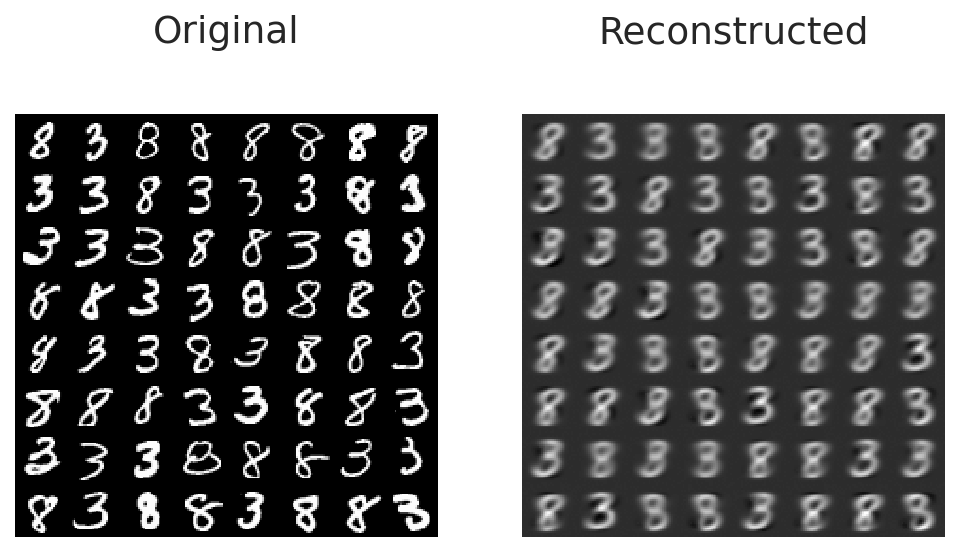

In [30]:
tmp = test_x * 255 + mu38

k = 0
for i in range(8):
    for j in range(8):
        x = tmp[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
        
sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(8,5), dpi=150)
    ax[0].matshow(I, cmap='gray')
    ax[0].axis(False)
    ax[0].set(
        title='Original'
    )    

    
k = 0
for i in range(8):
    for j in range(8):
        x = xhat[k].reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = x
        k += 1
sns.set_context('talk')
with sns.axes_style('white'):
    ax[1].matshow(I, cmap='gray')
    ax[1].axis(False)
    ax[1].set(
        title='Reconstructed'
    )

# Getting Latent Representations

In [31]:
def encoder(data):
    data = np.asmatrix(data)
    
    # apply the weights and biases of the first layer
    out1 = data*reg.coefs_[0] + reg.intercepts_[0]
    # tanh
    out1 = np.tanh(out1)
    
    # similar procedue for all other layers
    out2 = out1*reg.coefs_[1] + reg.intercepts_[1]
    out2 = np.tanh(out2)
    
    latent = out2*reg.coefs_[2] + reg.intercepts_[2]
    latent = np.tanh(latent)
    
    return np.asarray(latent)

In [33]:
test_x.shape

(2794, 784)

In [34]:
Z = encoder(test_x)
Z

array([[-0.07269061,  0.72378268],
       [-0.13975084, -0.44663684],
       [ 0.07439814, -0.0334179 ],
       ...,
       [-0.82093944, -0.09393657],
       [-0.173778  ,  0.00558471],
       [ 0.55865651,  0.59669161]])

In [35]:
Z.shape

(2794, 2)

In [36]:
test_y

array(['8', '3', '8', ..., '3', '3', '8'], dtype=object)

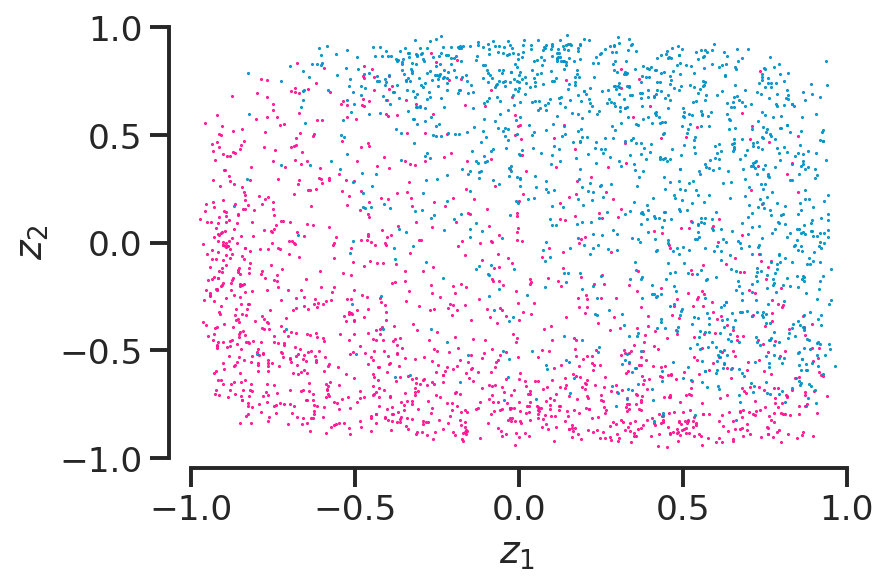

In [37]:
sns.set_context('talk')
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(dpi=150)
    for label, color in zip(["3", "8"], ['deeppink', sec_mid_blue]):
        ax.plot(Z[test_y == label, 0], Z[test_y == label, 1], '.', color=color, ms=1, label=f'{label}')
    ax.set(
        xlabel=r'$z_1$', 
        ylabel=r'$z_2$'
    )
    sns.despine(trim=True)

# Explore the latent space: Generate new examples

In [39]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    
    # now we are moving from the latent back to the image
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = np.tanh(decoder2)

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = np.tanh(decoder1)

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = np.tanh(reconst)

    return np.asarray(reconst)

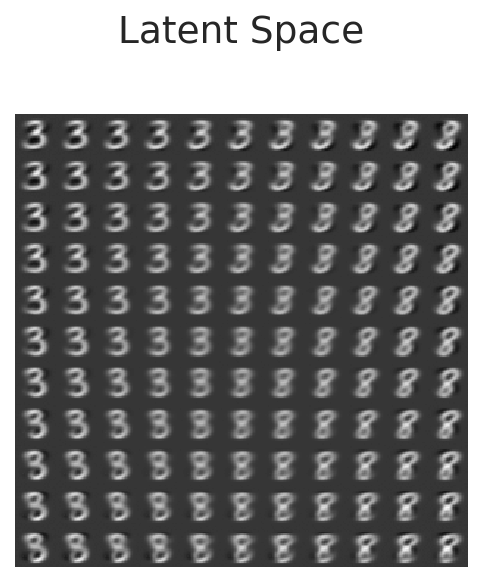

In [40]:
I = np.zeros((11 * 28, 11*28))

tiling = np.linspace(-1, 1, 11)

for i, x in enumerate(tiling):
    for j, y in enumerate(tiling):
        xhat = decoder(np.array([[x, y]])) * 255 + mu38
        xhat = xhat.reshape((28,28))
        I[i*28:(i+1)*28, j*28:(j+1)*28] = xhat

        sns.set_context('talk')
with sns.axes_style('white'):
    fig, ax = plt.subplots(dpi=150)
    ax.matshow(I, cmap='gray')
    ax.axis(False)
    ax.set(
        title='Latent Space'
    )    


# Exercise 2: Extend the Autoencoder to be able to reconstruct all 10 digits

### Q&A: Which modifications to the autoencoder and to the training need to be done?

### Q1: Show the loss curve for training this new autoencoder

### Q2: Show that the new latent spaces are actually uniquely capturing the digits

Modified from https://i-systems.github.io/teaching/ML/iNotes/15_Autoencoder.html

---

# Time Series

We now switch gears completely and turn our attention to time series data

In [41]:
!pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression


revenue_df = pd.read_csv('https://user.informatik.uni-goettingen.de/~sherbold/online_and_mail_shopping.csv',
                        header = 0, parse_dates = [0], names = ['Month', 'mdollars'], index_col = 0)
revenue_df

,mdollars
Month,
2002-01-01,9912
2002-02-01,8925
2002-03-01,9670
2002-04-01,9684
2002-05-01,9713
...,...
2013-08-01,29297
2013-09-01,28283
2013-10-01,29657


<AxesSubplot:xlabel='Month'>

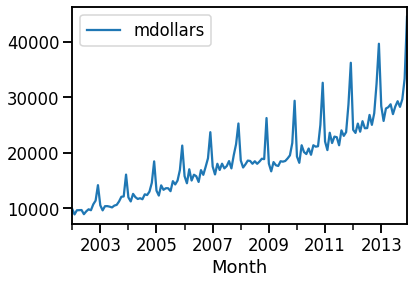

In [43]:
revenue_df.plot()

In [44]:
# let's rearrange our variable y, and create a simple index x
X = np.arange(1,revenue_df.shape[0]+1).reshape(-1, 1)
Y = revenue_df['mdollars'].values.reshape(-1, 1)

# What makes time series data special?

- data is dependent in time
- if the mean or the variance or higher order statistics change over time, then the data is non-stationary
- in order to run statistical analses, we first have to transform the data to be stationary

## 1. Detrending the Data

### Subtract the general trend

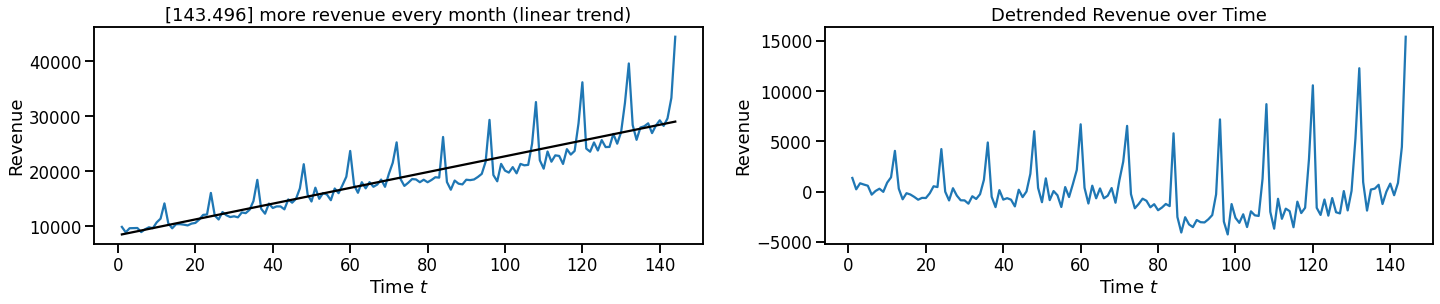

In [47]:
regr = LinearRegression()
ax = regr.fit(X, Y)
T_pred = regr.predict(X)[:,0]
revenue_df['mdollars_lin'] = revenue_df['mdollars']-T_pred

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title(f'{np.round(regr.coef_[0],3)} more revenue every month (linear trend)')
axes[0].plot(X, Y)
axes[0].plot(X, T_pred, color='black')
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Detrended Revenue over Time')
axes[1].plot(X, revenue_df['mdollars_lin'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

### Subtract the monthly mean: getting rid of the Seasonality

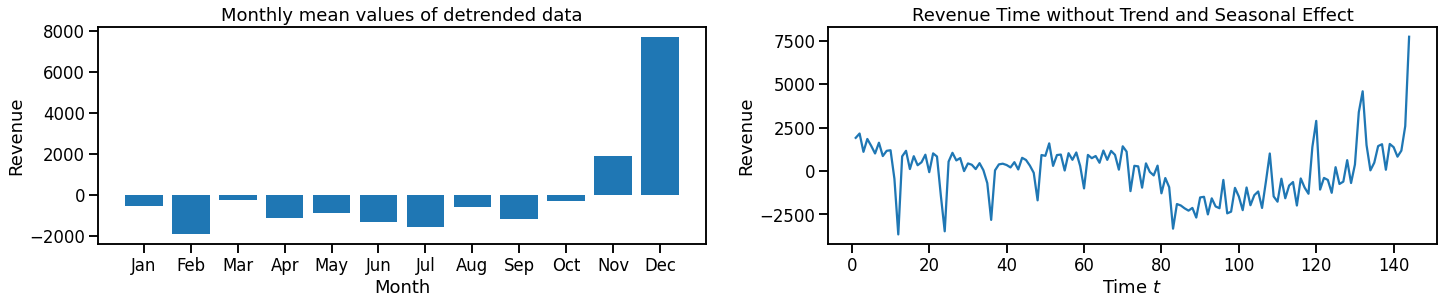

In [48]:
monthly_means = revenue_df['mdollars_lin'].groupby(revenue_df['mdollars_lin'].index.month).mean()

revenue_df['mdollars_lin_adj'] = revenue_df['mdollars_lin'] - np.tile(monthly_means,12)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Monthly mean values of detrended data')
axes[0].bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], monthly_means)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Revenue Time without Trend and Seasonal Effect')
axes[1].plot(X, revenue_df['mdollars_lin_adj'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

## Detrending with a simple Diff

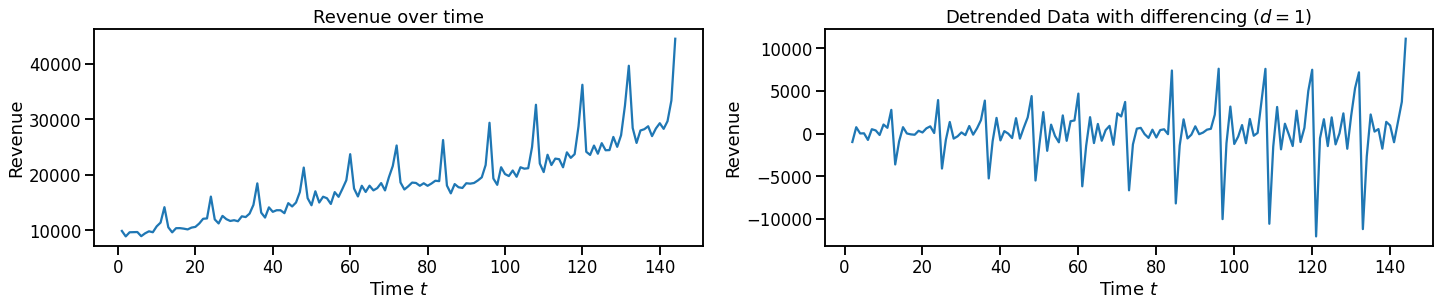

In [49]:
revenue_df['mdollars_diff'] = revenue_df['mdollars'].diff(1)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Revenue over time')
axes[0].plot(X, Y)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Detrended Data with differencing ($d=1$)')
axes[1].plot(X, revenue_df['mdollars_diff'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

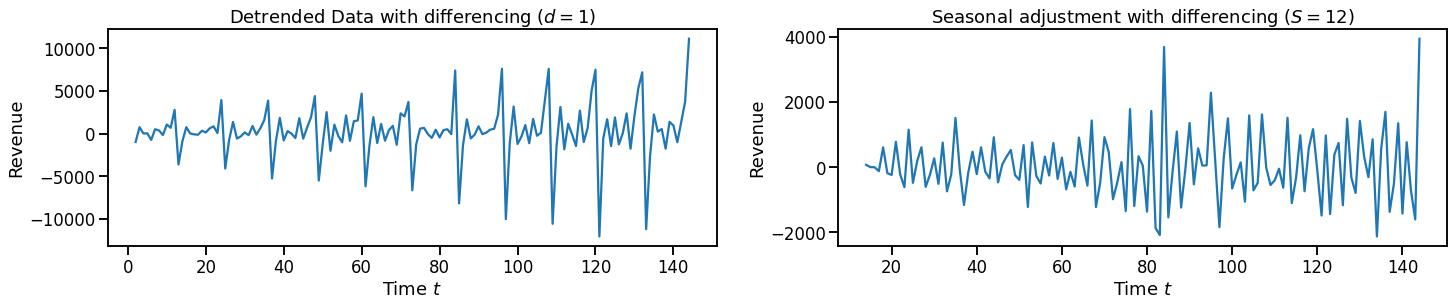

In [50]:
revenue_df['mdollars_diff_adj'] = revenue_df['mdollars_diff'].diff(periods=12)

f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].set_title('Detrended Data with differencing ($d=1$)')
axes[0].plot(X, revenue_df['mdollars_diff'])
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel('Revenue')

axes[1].set_title('Seasonal adjustment with differencing ($S=12$)')
axes[1].plot(X, revenue_df['mdollars_diff_adj'])
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel('Revenue')
plt.show()

# Making predictions in time with ARIMA models

- **Moving average** MA(q) models capture how past random effects afect the future of a time
series.
- **Autoregressive AR(p)** model capture how past events affect the future.
- Both together (ARMA) need stationary data.
- If the data has a trend, it can be removed by diferencing (d).
- ARMA models on diferenced data are called **ARIMA(q, d, p)**
- ARIMA models have problems with seasonal trends. This can be dealt with in SARIMA type
models.
- Since ARIMA models need a residual, they are only useful for short term prediction


In [51]:
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels import datasets

In [53]:
print(datasets.sunspots.NOTE)


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



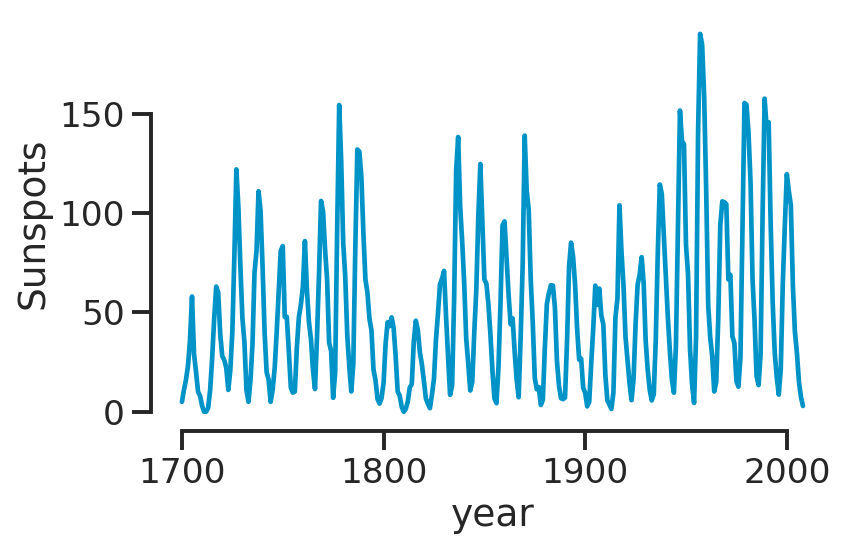

In [54]:
data = datasets.sunspots.load_pandas().data

x = data['SUNACTIVITY'].values.squeeze()
years = np.arange(1700,2009)

sns.set_context('talk')
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(years, x, '-',color=sec_mid_blue)
    sns.despine(trim=True)
    ax.set(
        xlabel = 'year',
        ylabel = 'Sunspots',
    )
    fig.tight_layout()

# Plot the autocorrelation function

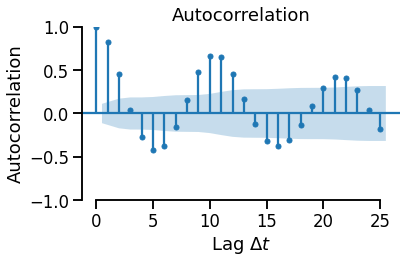

In [55]:
fig, ax = plt.subplots()
graphics.plot_acf(x, ax=ax)

ax.set(
    xlabel='Lag $\\Delta t$',
    ylabel=r'Autocorrelation',
    title='Autocorrelation'
)
sns.despine(trim=True)
plt.gcf().tight_layout()

## Fit the autoregressive model

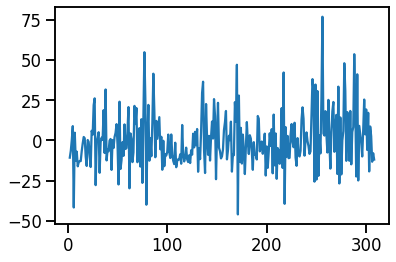

In [56]:
res = AutoReg(x, 2).fit()
pred = res.predict()

# plot the raw data with the autoregression subtracted
plt.plot(x - pred)
x2 = x - pred


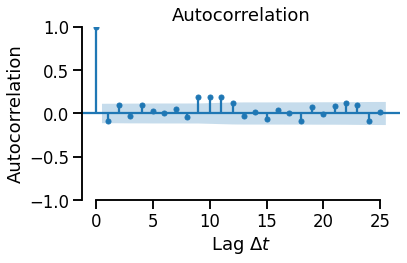

In [58]:
fig, ax = plt.subplots()
graphics.plot_acf(x2[2:], ax=ax)

ax.set(
    xlabel='Lag $\\Delta t$',
    ylabel=r'Autocorrelation',
    title='Autocorrelation'
)
sns.despine(trim=True)
plt.gcf().tight_layout()

## Comparing the Autocorrelation with the partial autocorrelation

#### Original data

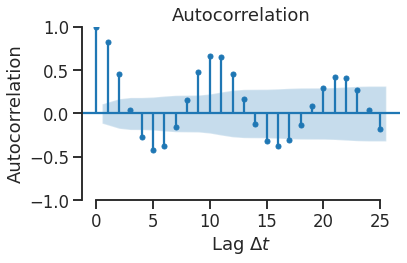

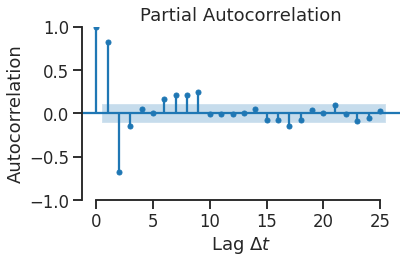

In [59]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots()
    graphics.plot_acf(x, ax=ax)

    ax.set(
        xlabel='Lag $\\Delta t$',
        ylabel=r'Autocorrelation',
        title='Autocorrelation'
    )
    sns.despine(trim=True)
    plt.gcf().tight_layout()

    fig, ax = plt.subplots()
    graphics.plot_pacf(x, ax=ax, method='ywm')
    ax.set(
        xlabel='Lag $\\Delta t$',
        ylabel=r'Autocorrelation',
        title='Partial Autocorrelation'
    )
    sns.despine(trim=True)
    plt.gcf().tight_layout()



#### Fitted Data

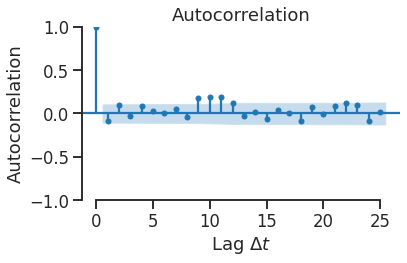

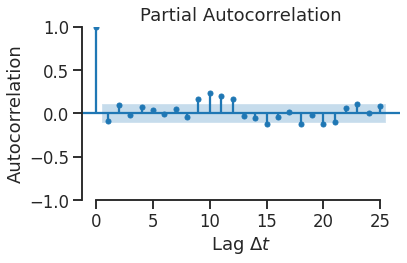

In [60]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots()
    graphics.plot_acf(x2[3:], ax=ax)

    ax.set(
        xlabel='Lag $\\Delta t$',
        ylabel=r'Autocorrelation',
        title='Autocorrelation'
    )
    sns.despine(trim=True)
    plt.gcf().tight_layout()

    fig, ax = plt.subplots()
    graphics.plot_pacf(x2[3:], ax=ax, method='ywm')
    ax.set(
        xlabel='Lag $\\Delta t$',
        ylabel=r'Autocorrelation',
        title='Partial Autocorrelation'
    )
    sns.despine(trim=True)
    plt.gcf().tight_layout()



## Fit an ARIMA model and make predictions into the future

In [61]:
p = 2
q = 0
d = 0

# build and fit the model
results = ARIMA(x, order=(p, d, q)).fit()

In [62]:
len(x)

309

In [63]:
# get predictions for a certain range
pred = results.get_prediction(0, len(x) + 39).predicted_mean

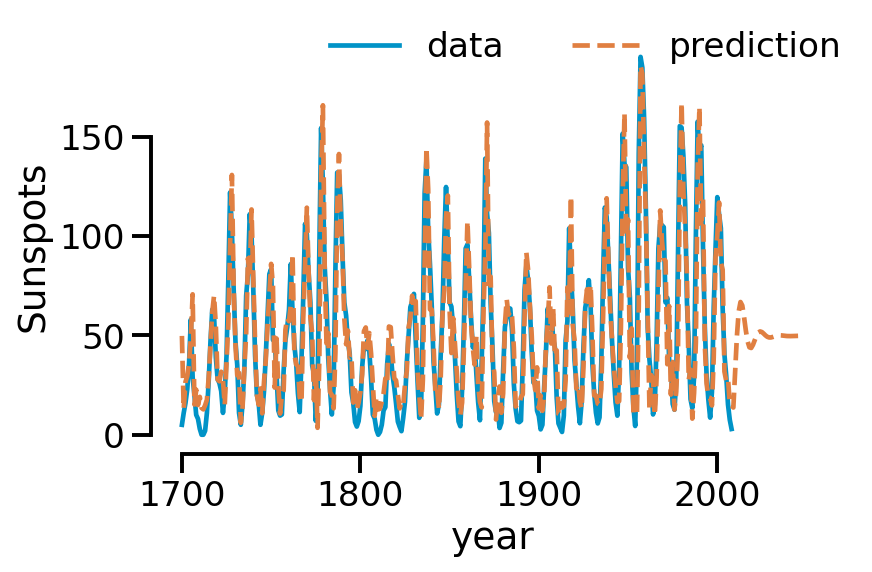

In [64]:
# plot the results
fig, ax = plt.subplots(dpi=150)
ax.plot(years, x, '-',color=sec_mid_blue, label='data')
ax.plot(np.arange(1700, 2009+40), pred, '--',color=cs_orange, label='prediction')
sns.despine(trim=True)
ax.set(
    xlabel = 'year',
    ylabel = r'Sunspots'
)
fig.legend(ncol=2, frameon=False)
fig.tight_layout()

